<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/Netflix_Movies_and_Score_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 들어가며

Netflix의 TV쇼와 영화 데이터와 그에 대한 IMDb 평점이 합쳐져 있는 데이터()를 가지고 간단한 EDA와 어떤 특징을 가진 컨텐츠가 평점을 높게 받았는지 살펴보도록 한다.

In [1]:
# 사용할 라이브러리 및 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
netflix = pd.read_csv('/content/mycsvfile.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# 영화와 TV쇼의 비중 확인

In [3]:
# type칼럼에서 영화와 Tv show의 비중을 살펴보기
fig = px.pie(netflix['type'].value_counts().reset_index(),
             values='type', names='index', template='plotly_dark')
fig.show()

역시나 영화가 TV show보다는 많다.

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6234 non-null   int64  
 1   type          6234 non-null   object 
 2   title         6234 non-null   object 
 3   director      4265 non-null   object 
 4   cast          6234 non-null   object 
 5   country       6234 non-null   object 
 6   date_added    6223 non-null   object 
 7   release_year  6234 non-null   int64  
 8   rating        6234 non-null   float64
 9   duration      6234 non-null   object 
 10  listed_in     6234 non-null   object 
 11  description   6234 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 584.6+ KB


In [5]:
netflix.describe()

,show_id,release_year,rating
count,6.234000e+03,6234.00000,6234.000000
mean,7.670368e+07,2013.35932,6.411726
std,1.094296e+07,8.81162,1.902971
min,2.477470e+05,1925.00000,0.000000
25%,8.003580e+07,2013.00000,5.900000
50%,8.016337e+07,2016.00000,6.800000
75%,8.024489e+07,2018.00000,7.600000
max,8.123573e+07,2020.00000,9.700000


In [6]:
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5470
country          555
date_added      1524
release_year      72
rating            78
duration         201
listed_in        461
description     6226
dtype: int64

In [7]:
# type 칼럼을 기준으로 TV show 데이터와 영화 데이터를 구분
shows = netflix[netflix['type'] == 'TV Show']
movies = netflix[netflix['type']== 'movie']

In [8]:
shows.describe()

,show_id,release_year,rating
count,1.969000e+03,1969.000000,1969.000000
mean,7.904892e+07,2015.536313,6.797054
std,3.462549e+06,5.799568,2.210533
min,6.003679e+07,1925.000000,0.000000
25%,8.009178e+07,2015.000000,6.500000
50%,8.017572e+07,2017.000000,7.500000
75%,8.023986e+07,2018.000000,8.100000
max,8.123560e+07,2020.000000,9.500000


In [9]:
movies.describe()

,show_id,release_year,rating
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


전체 평점 평균은 6.4점 중위값은 6.8이다.
TV쇼는 평점 평균 6.79 중위값은 7.5이다.
영화는 평점 평균 6.23 중위값은 6.5이다.
전체적으로 TV쇼에 대한 평가가 좋은 것을 알 수 있다.

# 예전 영화나 TV쇼가 많을까 최근 영화나 TV쇼가 많을까? 연도별과 평점을 상관관계가 있을까?



In [10]:
fig = px.histogram(netflix, x ='release_year', color='type', marginal='box', template='plotly_dark')
fig.show()

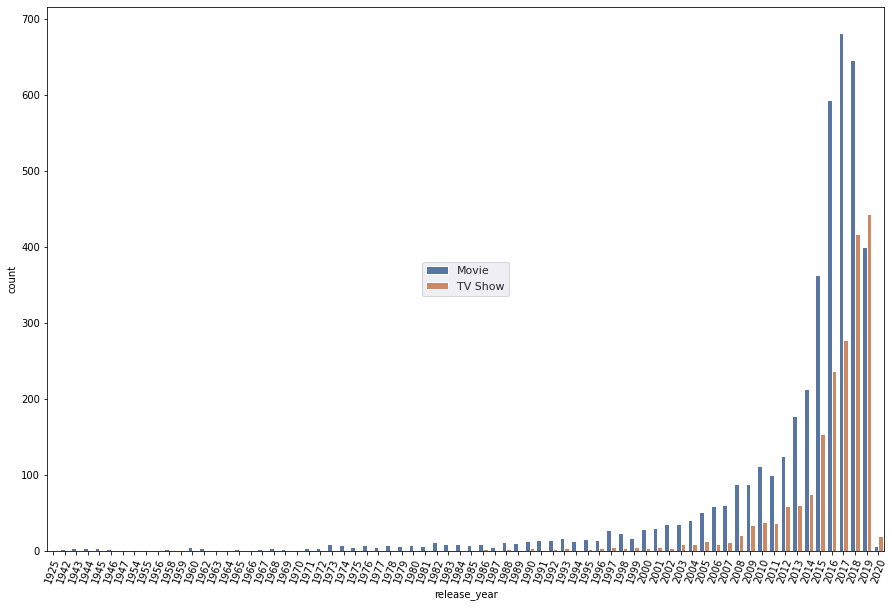

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="darkgrid")
sns.countplot(ax = ax, data = netflix, x = 'release_year', hue="type")
plt.legend(loc='center')
plt.xticks(rotation='70')
plt.show()

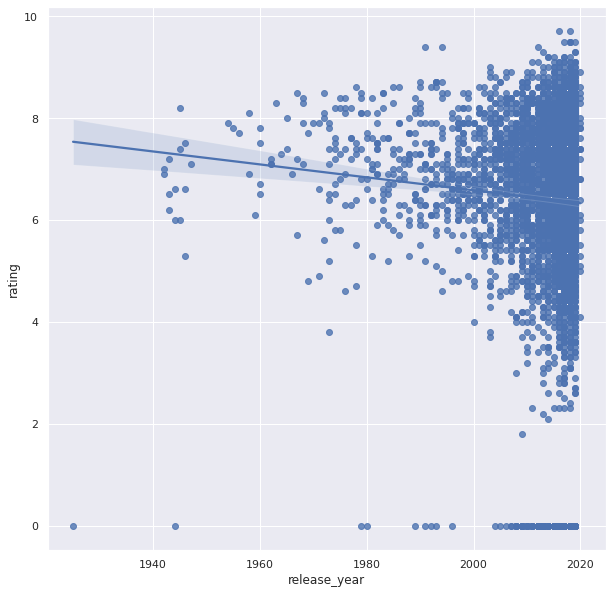

In [12]:
f1 = plt.figure(figsize=(10, 10))
#plt.scatter(netflix['release_year'], netflix['rating'])
sns.regplot(x = "release_year",y = "rating",data=netflix)
plt.show()

최근 작품이 많이 반영된 것을 알 수 있다.

옛날 작품이 평점이 높은 편이긴 하나, 좋은 작품만 지금까지 사람들에게 회자되기에 넷플릭스에 들어온거라 생각되기에 출시연도와 평점은 큰 관계가 없다 생각된다.

# 상영등급별 분석

가지고 있는 데이터는 rating이 IMDB 평점이기에, 다른 데이터에서 상영등급 데이터를 가져오기로 한다.

In [13]:
another_netflix = pd.read_csv('/content/netflix_titles.csv')
another_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
# 평점 데이터의 이름도 rating 이기에 상영등급 컬럼명을 변경한다.
another_netflix.rename(columns={'rating':'grade'}, inplace=True)
another_netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,grade,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [15]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


In [16]:
# grade 컬럼만 원래 있던 데이터프레임에 붙인다.
grade = pd.DataFrame({'title':another_netflix.title,
                    'grade':another_netflix.grade})
grade.drop_duplicates(subset=['title','grade'], inplace=True)
grade.shape


(8807, 2)

In [17]:
grade.dropna()
joint_data=grade.merge(netflix,left_on='title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='rating', ascending=False)
joint_data.head(2)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as..."
2357,Luciano Mellera: Infantiloide,TV-14,80192064,Movie,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,9.7,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...


In [18]:
# 상영등급 별 카운트 확인
fig = px.histogram(
    joint_data,
    x = 'grade',
    color = 'type',
    marginal = 'box',
    template = 'plotly_dark'
)

fig.show()

미국 기준이라 잘 와닿지 않는다. 아마존 심의등급을 기준으로 데이터를 다시 라벨링한다.

In [19]:
grade_data = { 'TV-PG': 7,'TV-MA': 18,'TV-Y7-FV': 7,'TV-Y7': 7,
            'TV-14': 16,'R': 18,'TV-Y': 0,'NR': 18,'PG-13': 13,
            'TV-G': 0,'PG': 7,'G': 0,'UR': 18,'NC-17': 18}
grade_re = pd.Series(grade_data, name='recommand_age')
grade_re

TV-PG        7
TV-MA       18
TV-Y7-FV     7
TV-Y7        7
TV-14       16
R           18
TV-Y         0
NR          18
PG-13       13
TV-G         0
PG           7
G            0
UR          18
NC-17       18
Name: recommand_age, dtype: int64

In [20]:
joint_data = pd.merge(joint_data, grade_re, left_on='grade',right_index=True)

In [21]:
joint_data.head(1)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16


In [22]:
# 아까 나누었던 영화와 TV쇼 데이터를 상영등급까지 추가된 것으로 바꾼다
movies = joint_data[joint_data['type']=='Movie']
shows = joint_data[joint_data['type']=='TV Show']

# grade 별로 카운트를 계산
grading_df = joint_data.groupby(['grade', 'recommand_age']).agg({'show_id':'count'}).reset_index()
grading_df.head()

,grade,recommand_age,show_id
0,G,0,33
1,NC-17,18,3
2,NR,18,80
3,PG,7,182
4,PG-13,13,286


In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(
    go.Pie(labels=shows['recommand_age'], values=shows['show_id']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=movies['recommand_age'], values=movies['show_id']),
    row=1, col=2
)

fig.update_layout(template='plotly_dark',
                  annotations = [dict(text='Movies', x=0.22, y=1, font_size=15),
                                 dict(text='TV Shows', x=0.77, y=1, font_size=15)])
fig.show()

TV Shows가 성인물이 더 많은 걸 알 수 있다.

In [24]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]])

fig.add_trace(
    go.Pie(labels=shows['recommand_age'], values=shows['show_id']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=movies['recommand_age'], values=movies['show_id']),
    row=1, col=2
)

fig.add_trace(
    go.Pie(labels=joint_data['recommand_age'], values=joint_data['show_id']),
    row=1, col=3
)

fig.update_layout(template='plotly_dark',
                  annotations = [dict(text='Movies', x=0.12, y=0.8, font_size=15),
                                 dict(text='TV Shows', x=0.5, y=0.8, font_size=15),
                                 dict(text='All', x=0.87, y=0.8, font_size=15)])
fig.show()

전체 기준으로 전체이용가(0, 7)은 25%가 되지 않는 걸 알 수 있다. 가족 모두가 즐길 컨텐츠는 상대적으로 빈약하다는 것을 알 수 있다.

In [25]:
joint_data.head(1)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16


In [26]:
rec_rating=joint_data.groupby(['type','recommand_age'])['rating'].mean()
rec_rating

type     recommand_age
Movie    0                5.634302
         7                6.147731
         13               6.413781
         16               6.209332
         18               6.296575
TV Show  0                6.418452
         7                6.447630
         13               6.600000
         16               6.701073
         18               7.119509
Name: rating, dtype: float64

영화는 많은 이가 볼 수 있는 청소년 이용 등급(13세)이 평점 평균이 가장 높은 반면,
TV Show는 특이하게도 상영등급이 높을 수록 평점이 높음. 

# 영화 상영 시간과 평점의 관계는 어떨까?

In [27]:
movies.head(3)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16
2357,Luciano Mellera: Infantiloide,TV-14,80192064,Movie,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,9.7,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,16
1729,Surga Yang Tak Dirindukan,TV-14,81047899,Movie,Kuntz Agus,"Fedi Nuril, Laudya Cynthia Bella, Raline Shah,...",Indonesia,"January 28, 2019",2015,9.2,121 min,"Dramas, Faith & Spirituality, International Mo...",After saving an unwed expectant mother who's i...,16


In [28]:
# 상영 시간 칼럼의 min 부분을 날리고, 숫자로 변환
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = movies['duration'].astype(str).astype(int)
movies['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5697    111
2357     66
1729    121
4209    124
811     131
       ... 
4805     78
4829     68
4582    103
6214    113
5461    103
Name: duration, Length: 4258, dtype: int64

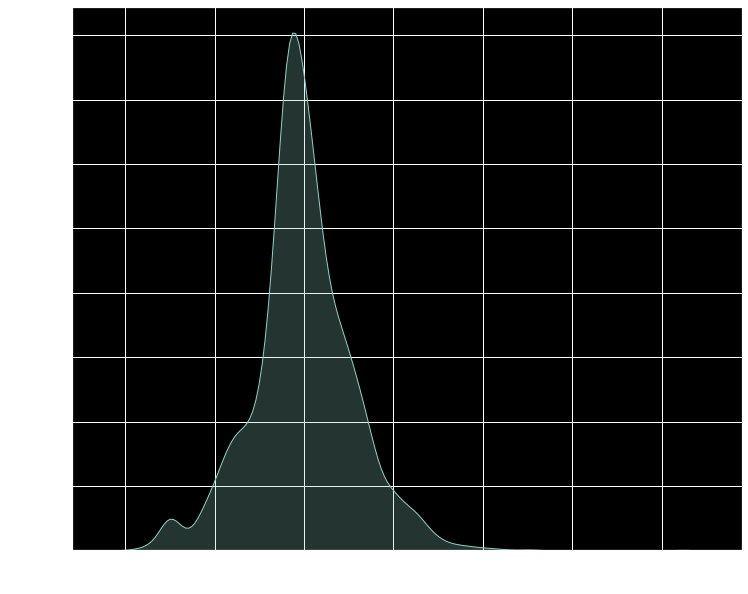

In [29]:
plt.figure(figsize=(12,10))
plt.style.use('dark_background')
sns.kdeplot(data=movies['duration'], shade=True)
plt.show()

In [30]:
movies.duration.mean()

99.12963832785346

영화 평균 상영 시간은 99분

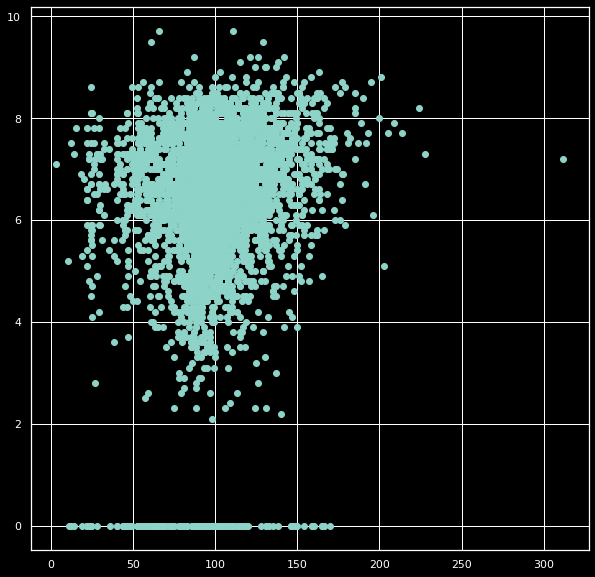

In [31]:
f2 = plt.figure(figsize=(10, 10))
plt.scatter(x = "duration", y = "rating",data=movies)
plt.show()

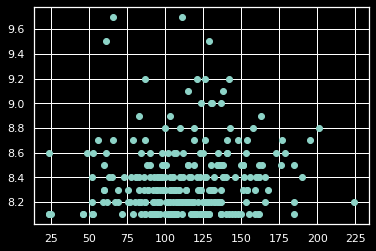

In [32]:
plt.scatter(x = "duration", y = "rating",data=movies[movies['rating']>8])


평점 최상위 작품 목록인 Top 250 최소 점수는 8.0 정도이다. 8점 이상의 영화를 기준으로 보았을때 75분~125분 사이에 가장 많다.

# 장르별 분석


In [33]:
joint_data.head(1)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16


In [34]:
from collections import Counter

genres = list(joint_data['listed_in'])
gen = []

for i in genres:
  i = list(i.split(','))
  for j in i:
    gen.append(j.replace(' ', ''))
g = Counter(gen)

In [35]:
genres_df = pd.DataFrame.from_records(g.most_common(), columns =['Movie&TV', 'number'])
genres_df.head()

,Movie&TV,number
0,InternationalMovies,1927
1,Dramas,1620
2,Comedies,1113
3,InternationalTVShows,1000
4,Documentaries,668


In [36]:
fig = px.bar(genres_df, x='Movie&TV', y='number', template='plotly_dark', color='number')
fig.show()

국제적 요소가 담긴 프로그램과, 드라마나 코미디가 가장 많은 걸 볼 수 있다.

In [37]:
joint_data.head(1)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16


## 장르별 평점 탐색하기
한 컨텐츠에 담긴 모든 장르로 평가하기엔 어려움이 있어 'listed_in' 행에서 가장 첫 번째 나타나는 장르를 기준으로 비교를 했다.

In [38]:
genres = list(joint_data['listed_in'])

In [52]:
genres[:10]

['Dramas, International Movies, Thrillers',
 'Stand-Up Comedy',
 'International TV Shows, TV Dramas',
 'Docuseries',
 'International TV Shows, TV Action & Adventure, TV Mysteries',
 'Dramas, Faith & Spirituality, International Movies',
 'British TV Shows, Classic & Cult TV, TV Comedies',
 'International TV Shows, Korean TV Shows, Romantic TV Shows',
 'British TV Shows, Crime TV Shows, International TV Shows',
 'International TV Shows, Romantic TV Shows, TV Action & Adventure']

In [53]:
genres_first = []
for i in genres:
  i = i.replace(' ','')
  i = i.split(',')
  genres_first.append(i[0])


In [54]:
genres_first[:10]

['Dramas',
 'Stand-UpComedy',
 'InternationalTVShows',
 'Docuseries',
 'InternationalTVShows',
 'Dramas',
 'BritishTVShows',
 'InternationalTVShows',
 'BritishTVShows',
 'InternationalTVShows']

In [42]:
joint_data.head(1)

,title,grade,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,recommand_age
5697,The Chosen,TV-14,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,9.7,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",16


In [43]:
rating4genres = list(joint_data['rating'])

In [56]:
genres_rating = pd.DataFrame([genres_first, rating4genres])
genres_rating = genres_rating.T
genres_rating.columns = ['genre','rating']
genres_rating

,genre,rating
0,Dramas,9.7
1,Stand-UpComedy,9.7
2,InternationalTVShows,9.4
3,Docuseries,9.3
4,InternationalTVShows,9.3
...,...,...
6220,Children&FamilyMovies,3.0
6221,Children&FamilyMovies,0.0
6222,Dramas,5.8
6223,Action&Adventure,5.7


In [63]:
genres_rating_mean = genres_rating.groupby(['genre'])['rating'].mean()
fig = px.bar(genres_rating_mean.sort_values(ascending=False))
fig.show()

스페인어 TV쇼가 평균 점수가 가장 높게 나왔다. "아무리 스페인어권 사람들이 TV쇼를 잘 만든다고 할지라도 평균이 8점 이상이 나올까"라는 의구심이 들었다. 표본이 너무 적지 않은지 확인하도록 한다.

In [66]:
genre_count = genres_rating.groupby(['genre'])['rating'].count()
genre_count.sort_values(ascending=True)

genre
Spanish-LanguageTVShows        1
TVSci-Fi&Fantasy               1
SportsMovies                   1
RomanticMovies                 2
TVHorror                       9
Sci-Fi&Fantasy                10
TVShows                       10
CultMovies                    10
AnimeFeatures                 12
Music&Musicals                12
IndependentMovies             18
Classic&CultTV                19
RomanticTVShows               21
Stand-UpComedy&TalkShows      28
TVAction&Adventure            30
Thrillers                     40
Movies                        52
TVDramas                      56
ClassicMovies                 61
RealityTV                     63
InternationalMovies           85
TVComedies                    89
AnimeSeries                  116
Docuseries                   148
HorrorMovies                 205
BritishTVShows               210
Stand-UpComedy               273
Kids'TV                      287
CrimeTVShows                 309
Children&FamilyMovies        358
Inte

살펴보니 역시나 평균 평점 1위인 Spanish-LanguageTVShows, 3위인 TVSci-Fi&Fantasy의 표본은 하나씩 밖에 없다.

Classic&CultTV은 표본이 19개 밖에 없긴하나 평균 평점이 7.9로 매우 높다.

## 영화만 보았을 때

In [67]:
genres = list(movies['listed_in'])
genres_first = []
for i in genres:
  i = i.replace(' ','')
  i = i.split(',')
  genres_first.append(i[0])

rating4genres = list(movies['rating'])
genres_rating = pd.DataFrame([genres_first, rating4genres])
genres_rating = genres_rating.T
genres_rating.columns = ['genre','rating']
genres_rating_mean = genres_rating.groupby(['genre'])['rating'].mean()
fig = px.bar(genres_rating_mean.sort_values(ascending=False))
fig.show()

In [68]:
genre_count = genres_rating.groupby(['genre'])['rating'].count()
genre_count.sort_values(ascending=True)

genre
SportsMovies                1
RomanticMovies              2
Sci-Fi&Fantasy             10
CultMovies                 10
AnimeFeatures              12
Music&Musicals             12
IndependentMovies          18
Thrillers                  40
Movies                     52
ClassicMovies              61
InternationalMovies        85
HorrorMovies              205
Stand-UpComedy            273
Children&FamilyMovies     358
Action&Adventure          597
Documentaries             644
Comedies                  803
Dramas                   1075
Name: rating, dtype: int64

영화만 따로 보았을 경우 Music&Musicals, AnimeFeatures는 각각 평균 평점 1위와 3위를 차지했으나, 표본이 12개 밖에 되지 않는다.

ClassicMovies는 평균 평점이 2위이나 표본이 61개로 많은 편이라곤 할 수 없다. 그리고 잘 만든 영화만 지금까지 수요가 있어 넷플릭스에 콘텐츠가 추가된 것으로 볼 수도 있다.

표본을 고려하면 평균 평점 4위인 Dramas가 표본도 가장 많고 평균 평점도 많은 것을 알 수 있다.

## TV쇼만 보았을 때



In [69]:
genres = list(shows['listed_in'])
genres_first = []
for i in genres:
  i = i.replace(' ','')
  i = i.split(',')
  genres_first.append(i[0])

rating4genres = list(shows['rating'])
genres_rating = pd.DataFrame([genres_first, rating4genres])
genres_rating = genres_rating.T
genres_rating.columns = ['genre','rating']
genres_rating_mean = genres_rating.groupby(['genre'])['rating'].mean()
fig = px.bar(genres_rating_mean.sort_values(ascending=False))
fig.show()

In [70]:
genre_count = genres_rating.groupby(['genre'])['rating'].count()
genre_count.sort_values(ascending=True)

genre
Spanish-LanguageTVShows       1
TVSci-Fi&Fantasy              1
TVHorror                      9
TVShows                      10
Classic&CultTV               19
RomanticTVShows              21
Stand-UpComedy&TalkShows     28
TVAction&Adventure           30
TVDramas                     56
RealityTV                    63
TVComedies                   89
AnimeSeries                 116
Docuseries                  148
BritishTVShows              210
Kids'TV                     287
CrimeTVShows                309
InternationalTVShows        570
Name: rating, dtype: int64

앞서 살펴본 것처럼 Spanish-LanguageTVShows, Classic&CultTV, TVSci-Fi&Fantasy는 각각 평균 평점 1, 2, 3위를 차지하긴 했으나 각각 표본이 1, 19, 1로 많다고 할 수 없다.

평균 평점 4, 5위인 TVDramas와 TVComidies는 표본이 56, 89로 그렇게 많다고는 볼 수 없다.


In [71]:
rec_rating

type     recommand_age
Movie    0                5.634302
         7                6.147731
         13               6.413781
         16               6.209332
         18               6.296575
TV Show  0                6.418452
         7                6.447630
         13               6.600000
         16               6.701073
         18               7.119509
Name: rating, dtype: float64

앞서 살펴본 상영등급별 평균 평점은 위와 같았는데, 18세 이상 시청 가능 작품이 높은 평점을 얻은 걸로 봐서 CrimeTVShows가 표본도 많고 의미 있는 대상이라 볼 수 있다 생각된다.

# 좋은 컨텐츠 공식

위에 간단히 살펴본 데이터를 보았을 때 좋은 평점을 받을 컨텐츠는 다음과 같다고 볼 수 있다.

영화의 경우 청소년이용가 작품을 집중력을 유지하기 좋은 시간인 75~125분으로 장르는 이야기가 있는 Dramas나, Music&Musicals, AnimeFeatures도 좋다고 생각된다.

TV쇼의 경우 성인이용가 작품을 범죄가 소재인 CrimeTVShows장르로 만들면 좋을 것이다 생각된다.